In [2]:
# !pip install keras-vis

In [171]:
from random import randint
import matplotlib.pylab as plt 
import numpy as np
import glob,rasterio
from rasterio.plot import show
from tensorflow.keras import models
from rasterio.plot import reshape_as_image
from tensorflow.keras.models import Sequential, Model

In [172]:
model_id = "aanaxs4g" # With mask
# model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]

# print(model_path)
cnn_model = models.load_model(model_path)

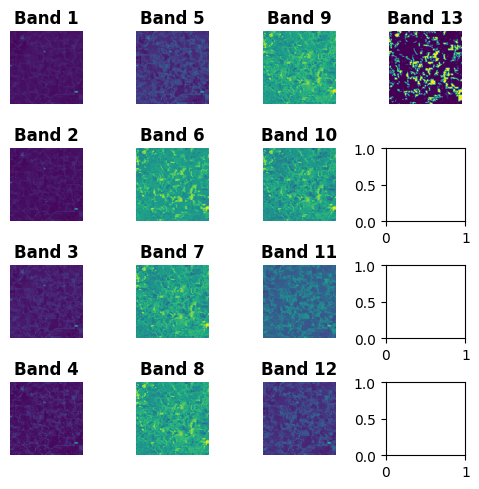

In [173]:
#Input
file = rasterio.open('Input/sentinel/patches_256/Iowa_July_1_31/test/Iowa_2021_july_1280-3072.tif')

fig, ax = plt.subplots(4,4,figsize=(5,5))

col = 0 
row = 0
for i in range(1,file.count+1):
#     print(row,col)
    
    show((file,i),ax = ax[row,col],title = "Band "+str(i))
    ax[row,col].axis("off")
    row+=1
    if i >= 4 and i %4==0:
        row = 0
        col+=1
#     col+=1
plt.tight_layout()

In [174]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

ImportError: cannot import name '_Conv' from 'keras.layers.convolutional' (/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/__init__.py)

In [13]:
# def get_feature_maps(model, layer_id, input_image):
#     model_ = Model(inputs=[model.input], 
#                    outputs=[model.layers[layer_id].output])
#     return model_.predict(np.expand_dims(input_image, 
#                                          axis=0))[0,:,:,:].transpose((2,0,1))

# def plot_features_map(img_idx=None, layer_idx=[0, 2, 4, 6, 8, 10, 12, 16], 
#                       x_test=x_test, ytest=ytest, cnn=cnn):
#     if img_idx == None:
#         img_idx = randint(0, ytest.shape[0])
#     input_image = x_test[img_idx]
#     fig, ax = plt.subplots(3,3,figsize=(10,10))
#     ax[0][0].imshow(input_image)
#     ax[0][0].set_title('original img id {} - {}'.format(img_idx, 
#                                                         labels[ytest[img_idx][0]]))
#     for i, l in enumerate(layer_idx):
#         feature_map = get_feature_maps(cnn_model, l, input_image)
#         ax[(i+1)//3][(i+1)%3].imshow(feature_map[:,:,0])
#         ax[(i+1)//3][(i+1)%3].set_title('layer {} - {}'.format(l, 
#                                                                cnn.layers[l].get_config()['name']))
#     return img_idx

# labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# img_idx = plot_features_map()

# With Masking

In [175]:
cnn_model.inputs

[<KerasTensor: shape=(None, 256, 256, 13) dtype=float32 (created by layer 'conv2d_input')>]

In [176]:
cnn_model.layers

In [177]:
outputs = cnn_model.layers[0].output
model = Model(inputs=cnn_model.inputs, outputs=outputs)

In [178]:
img = reshape_as_image(file.read())
img.shape

(256, 256, 13)

In [179]:
# get feature map for first hidden layer
img_batch = np.expand_dims(img, axis=0)
feature_maps = model.predict(img_batch)

1/1 [==============================] - 0s 29ms/step


In [180]:
feature_maps.shape

(1, 254, 254, 32)

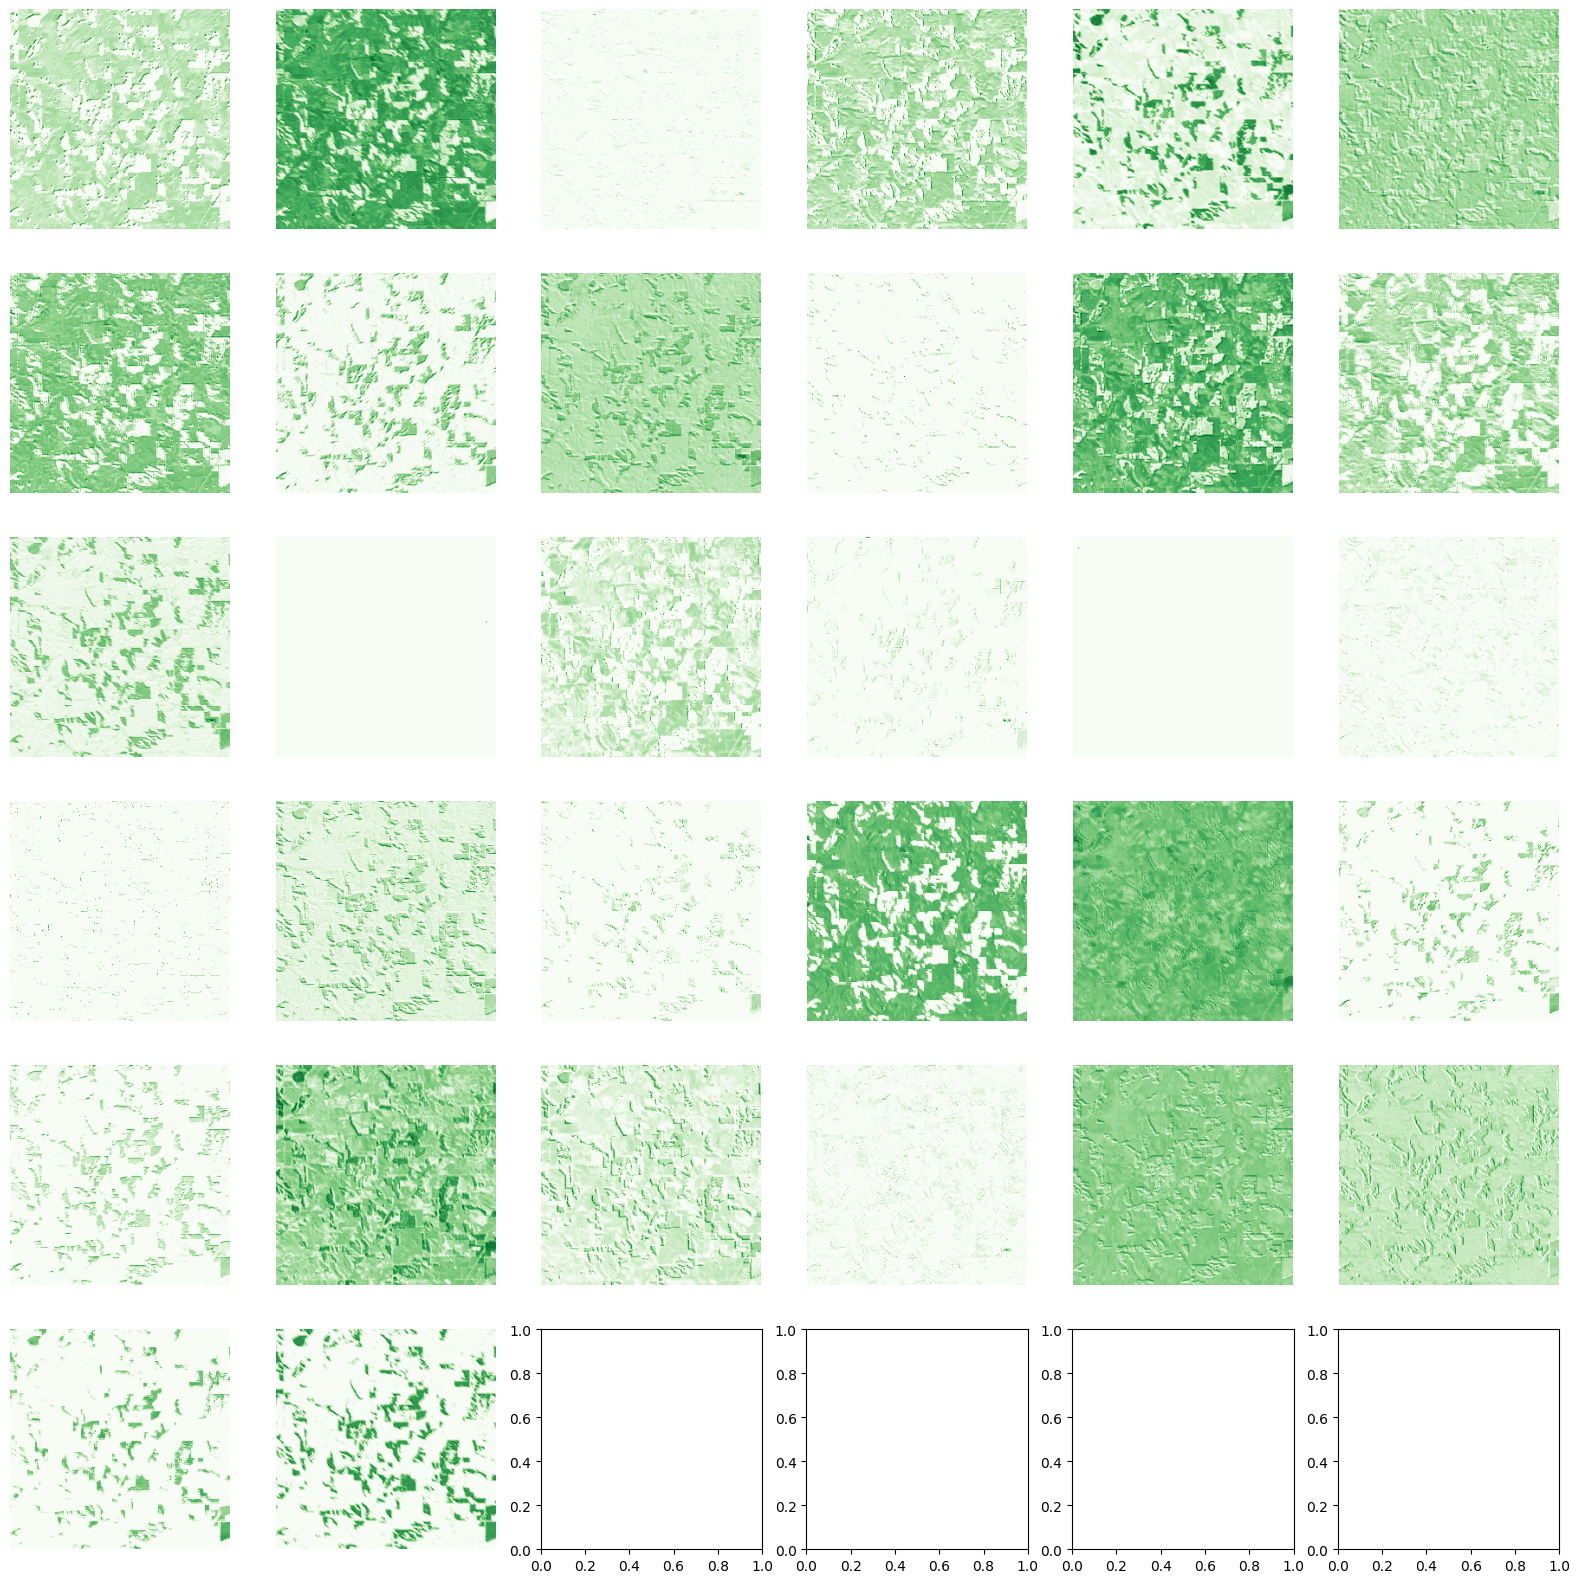

In [181]:
nrows = 6
ncols = 6
x_index = 0
y_index = 0
count = 0
fig,ax = plt.subplots(nrows,ncols,figsize=(20,20))
for i in range(32):
    # ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens",vmin = feature_maps[0].min(),vmax=feature_maps[0].max())
    ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens")

    ax[x_index,y_index].axis("off")
    y_index += 1
    # print(x_index,y_index)
    if y_index >= 6:
        y_index =0
        x_index+=1

In [182]:
output_list = [i.output for i in cnn_model.layers]
model = Model(inputs=cnn_model.inputs, outputs=output_list)
# get feature map for first hidden layer
img_batch = np.expand_dims(img, axis=0)
feature_maps = model.predict(img_batch)
for layer in feature_maps:
    print(layer.shape)

1/1 [==============================] - 0s 67ms/step
(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 64)
(1, 62, 62, 64)
(1, 60, 60, 64)
(1, 30, 30, 64)
(1, 57600)
(1, 64)
(1, 32)
(1, 1)


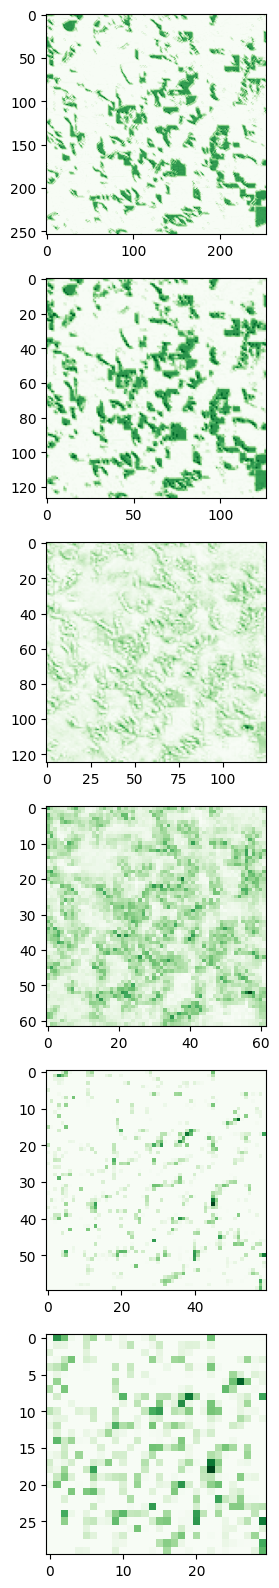

In [184]:
fig,ax = plt.subplots(6,figsize=(20,20))
count = 0
feature_maps_masked = list()
for layer in feature_maps:
    if count > 5:
        break
    for i in layer:
        ax[count].imshow(i[:,:,-1],cmap="Greens")
        feature_maps_masked.append(i[:,:,-1])
    count+=1

# Without Mask

In [185]:
img_nomask = img[:,:,0:12]

1/1 [==============================] - 0s 28ms/step


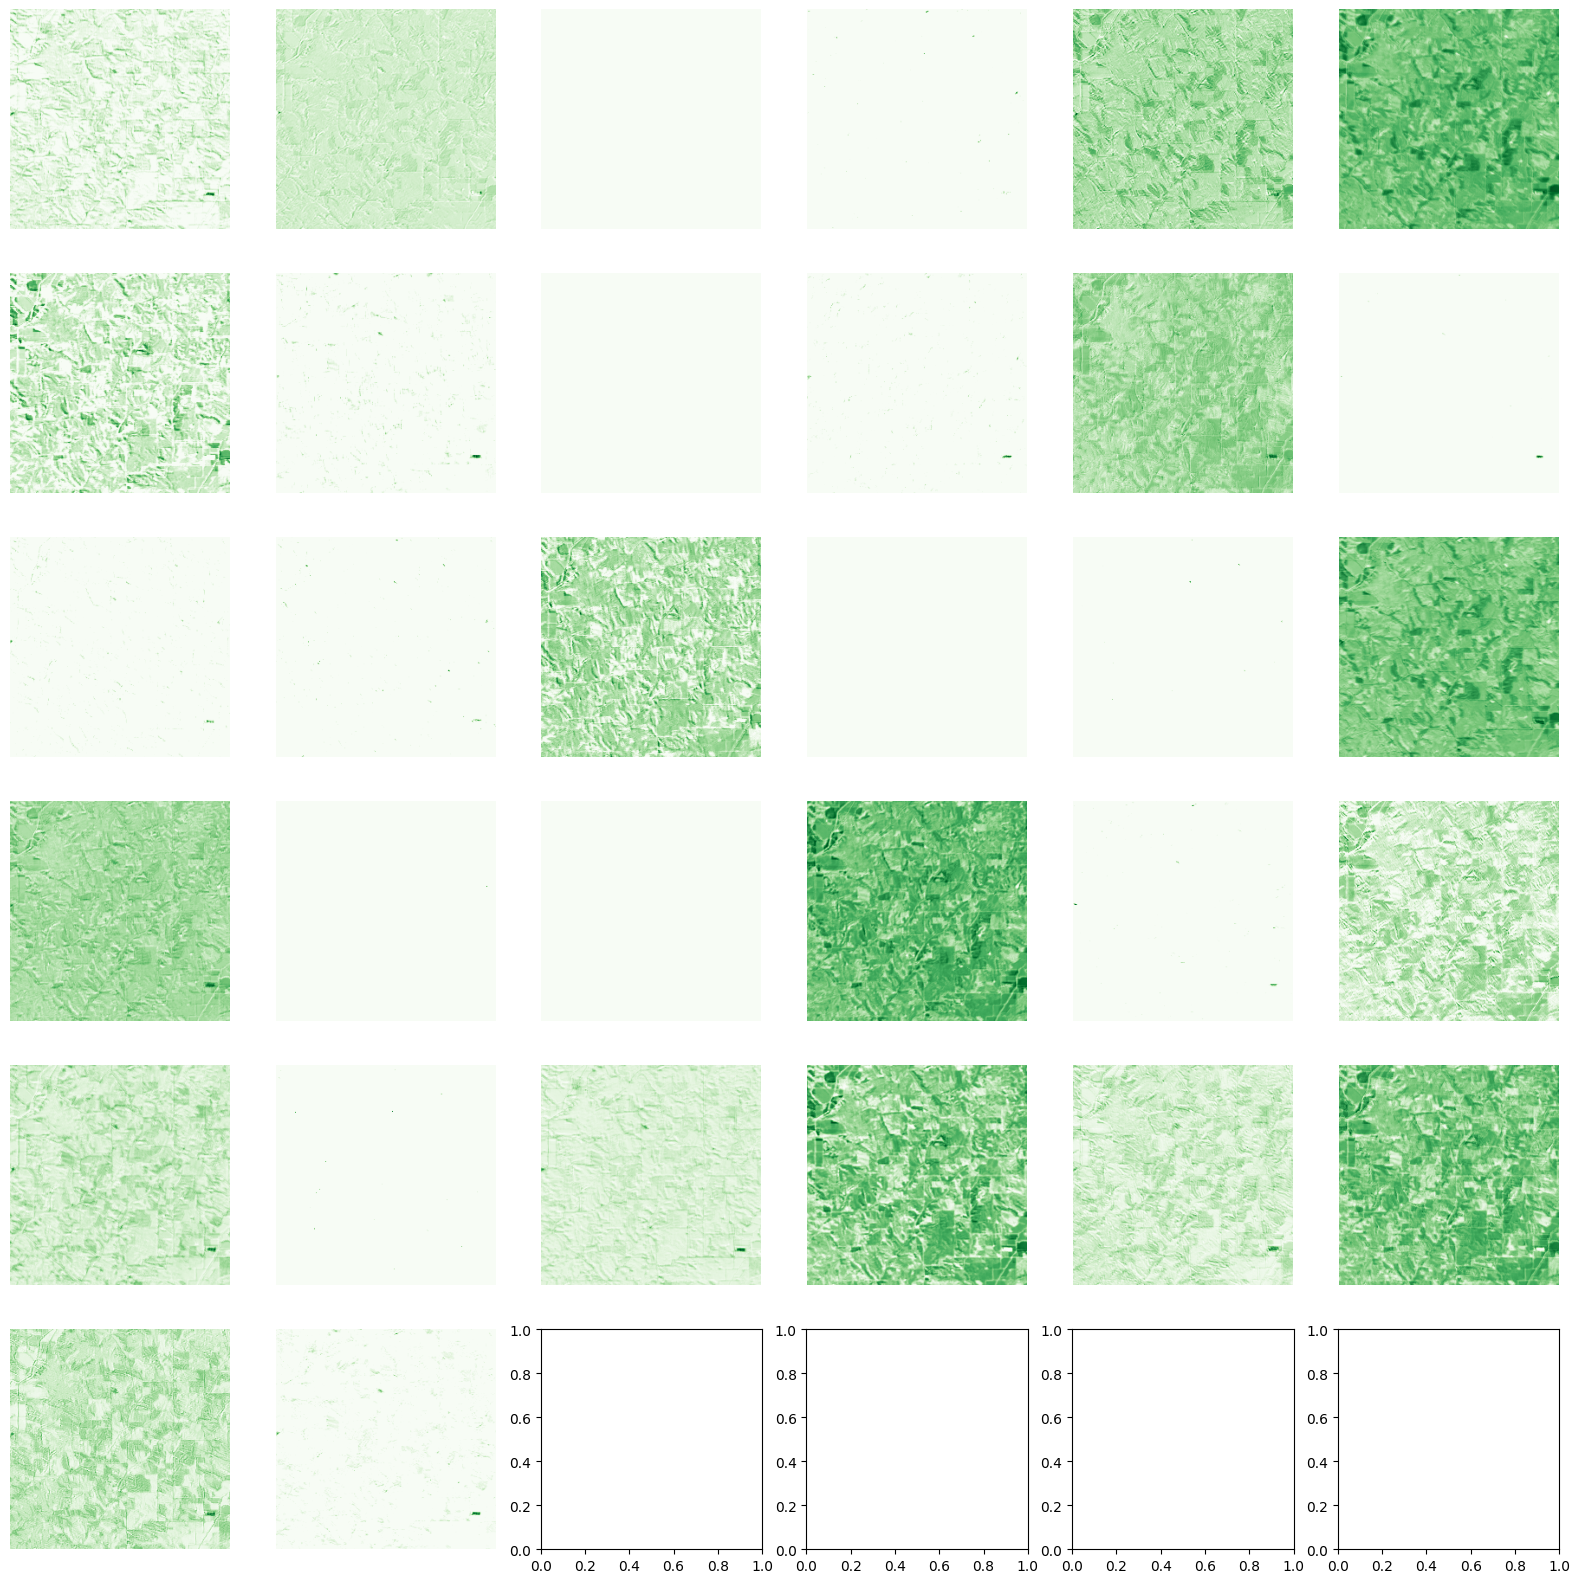

In [186]:
# model_id = "aanaxs4g" # With mask
model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]

# print(model_path)
cnn_model = models.load_model(model_path)
outputs = cnn_model.layers[0].output
# outputs = [i.output for i in cnn_model.layers]
model = Model(inputs=cnn_model.inputs, outputs=outputs)
# get feature map for first hidden layer
img_batch = np.expand_dims(img_nomask, axis=0)
feature_maps = model.predict(img_batch)
nrows = 6
ncols = 6
x_index = 0
y_index = 0
count = 0
fig,ax = plt.subplots(nrows,ncols,figsize=(20,20))
for i in range(32):
    # ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens",vmin = feature_maps[0].min(),vmax=feature_maps[0].max())
    ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens")

    ax[x_index,y_index].axis("off")
    y_index += 1
    # print(x_index,y_index)
    if y_index >= 6:
        y_index =0
        x_index+=1

In [187]:
outputs = [i.output for i in cnn_model.layers]
model = Model(inputs=cnn_model.inputs, outputs=outputs)
# get feature map for first hidden layer
img_batch = np.expand_dims(img_nomask, axis=0)
feature_maps = model.predict(img_batch)

1/1 [==============================] - 0s 65ms/step


In [188]:
for layer in feature_maps:
    print(layer.shape)

(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 64)
(1, 62, 62, 64)
(1, 60, 60, 64)
(1, 30, 30, 64)
(1, 57600)
(1, 64)
(1, 32)
(1, 1)


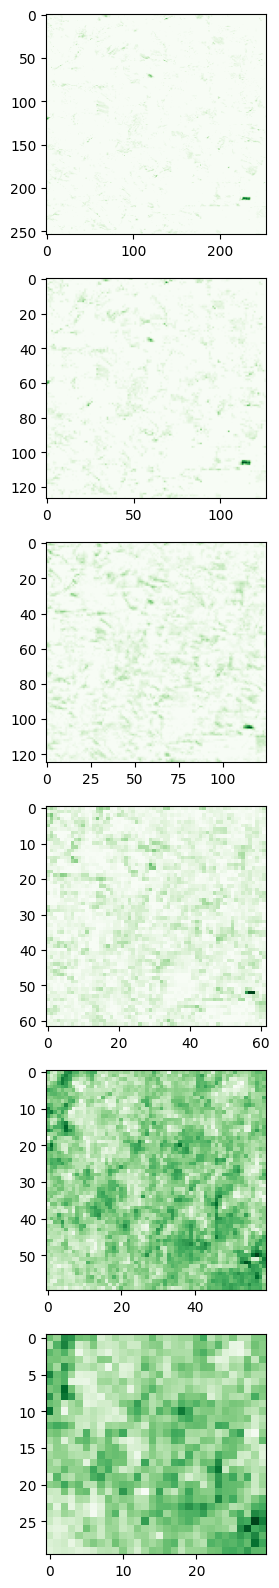

In [189]:
fig,ax = plt.subplots(6,figsize=(20,20))
count = 0
feature_maps_nomask = list()
for layer in feature_maps:
    if count > 5:
        break
    for i in layer:
        ax[count].imshow(i[:,:,-1],cmap="Greens")
        feature_maps_nomask.append(i[:,:,-1])
    count+=1

In [215]:
feature_map_list = np.array(feature_maps_masked + feature_maps_nomask,dtype=object)
feature_map_list.shape

(12,)

In [219]:
feature_list_flat = list()
for i in feature_map_list:
    i = i.flatten()
    feature_list_flat.extend(i)

In [221]:
len(feature_list_flat)

209228

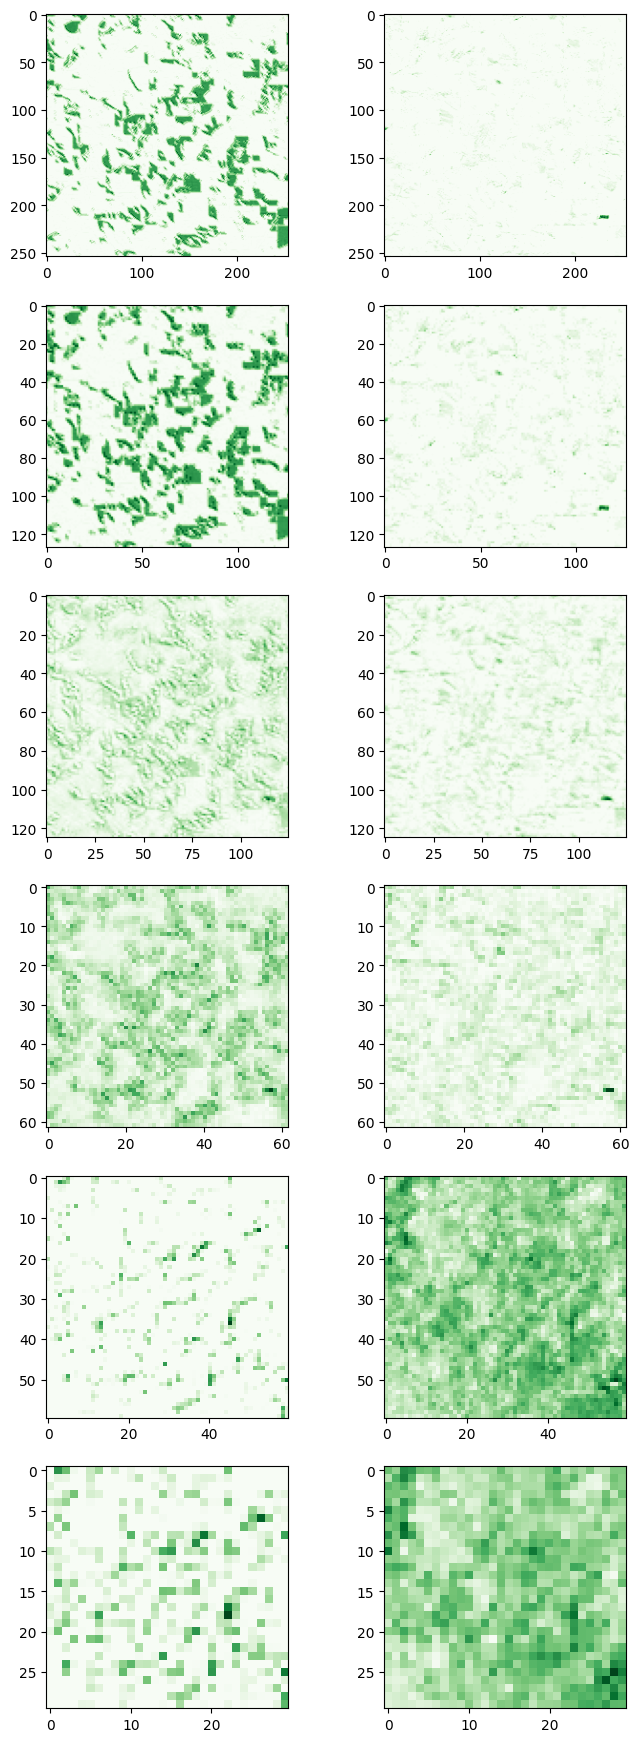

In [231]:
fig,ax = plt.subplots(6,2,figsize=(8,22))
for i in range(6):
    with_mask = feature_maps_masked[i]
    without_mask = feature_maps_nomask[i]
    # ax[i,0].imshow(with_mask,cmap="Greens",vmin=np.min(feature_list_flat),vmax=np.max(feature_list_flat))
    # ax[i,1].imshow(without_mask,cmap="Greens",vmin=np.min(feature_list_flat),vmax=np.max(feature_list_flat))
    ax[i,0].imshow(with_mask,cmap="Greens")
    ax[i,1].imshow(without_mask,cmap="Greens")

    # for i in layer:
    #     ax[count].imshow(i[:,:,0],cmap="Greens")
